In [1]:
import pandas as pd
import seaborn as sns

## Reading the data

In [2]:
df = pd.read_csv("iris.csv")

In [ ]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [44]:
df["variety"].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

# Exploratory Data Analysis

## Univariate analysis

Text(0.5, 1.0, 'Iris Data')

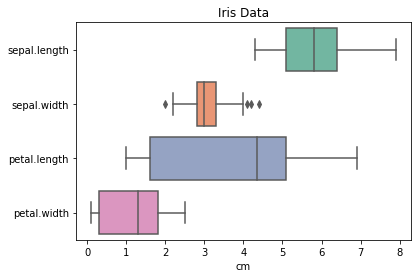

In [41]:
# Boxplot of the data
g = sns.boxplot(data=df, orient="h", palette="Set2")
g.set(xlabel="cm", ylabel="")
g.set_title("Iris Data")

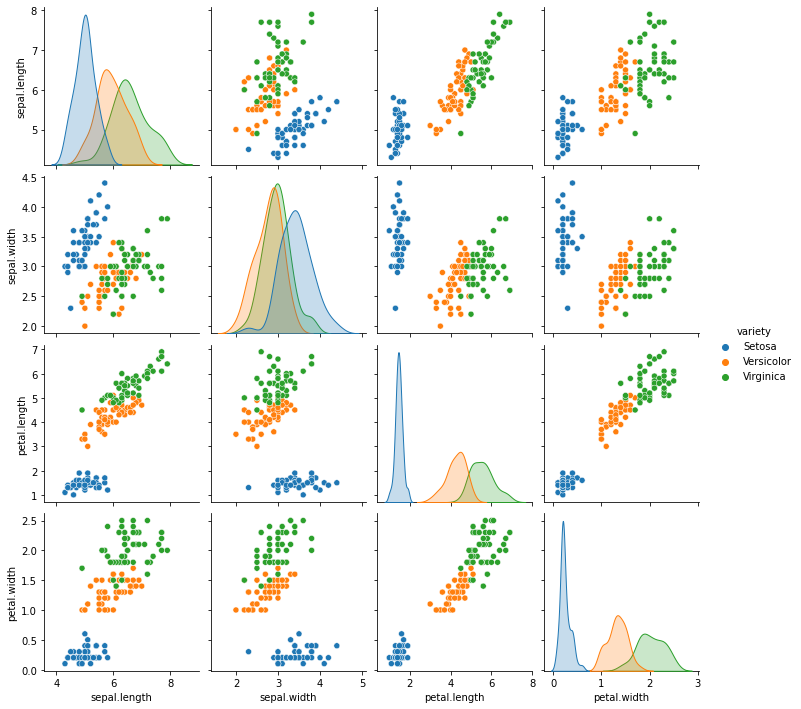

In [18]:
# Use seaborn to plot the data
g = sns.pairplot(df, hue="variety")

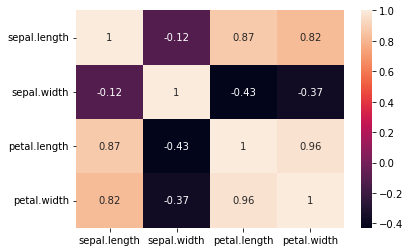

In [20]:
# correlation matrix with seaborn
g = sns.heatmap(df.corr(), annot=True)

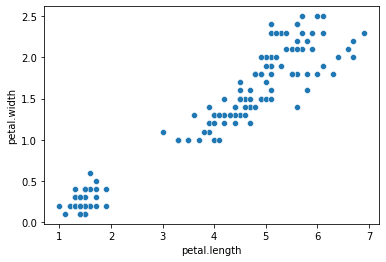

In [21]:
g = sns.scatterplot(x="petal.length", y="petal.width", data=df)

In [22]:
from sklearn.preprocessing import StandardScaler

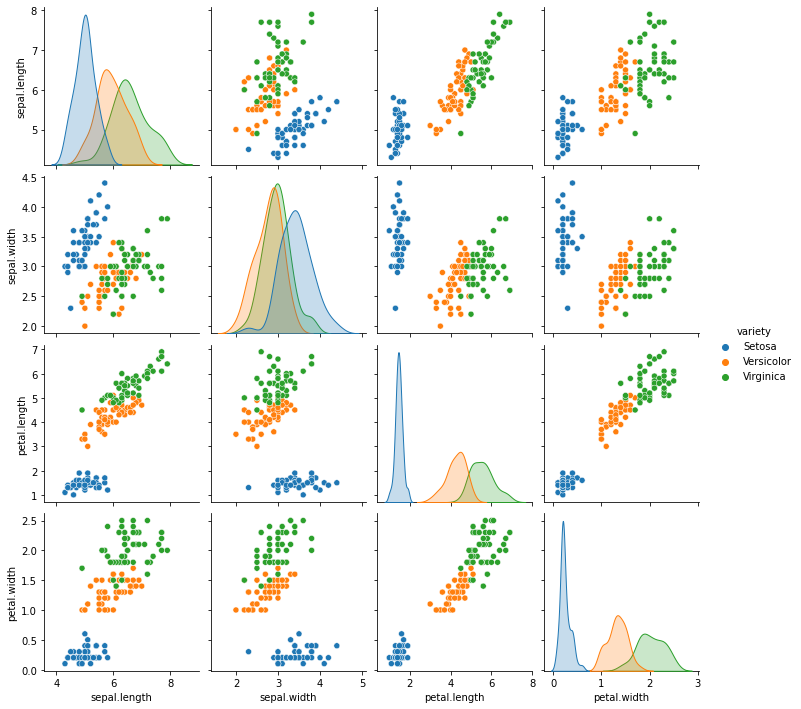

In [23]:
g = sns.pairplot(df, hue="variety")

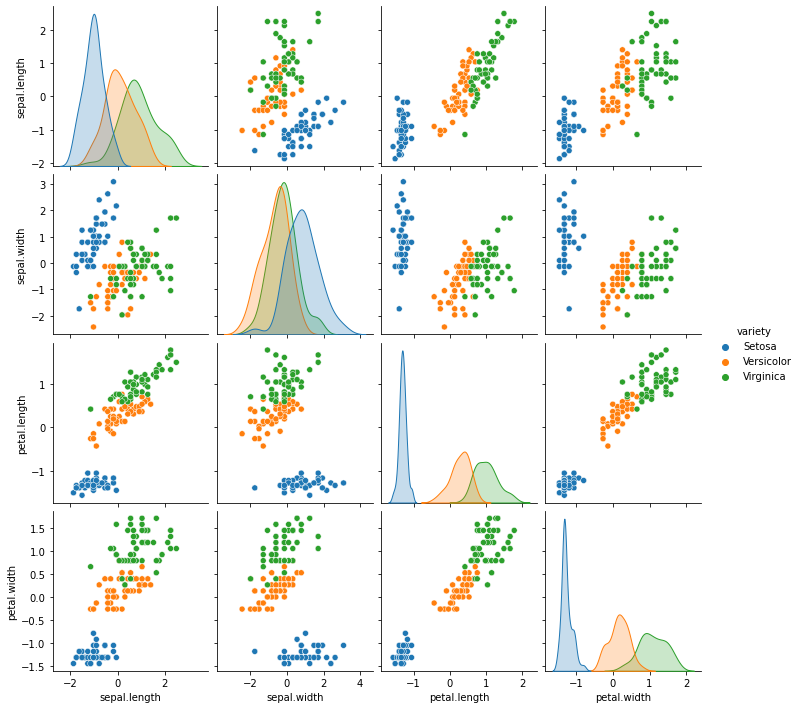

In [24]:
normalizer = StandardScaler()
df_norm = normalizer.fit_transform(df.drop(["variety"], axis=1))
df_norm = pd.DataFrame(df_norm, columns=df.columns[:-1])
df_norm = pd.concat([df_norm, df["variety"]], axis=1)
g = sns.pairplot(df_norm, hue="variety")

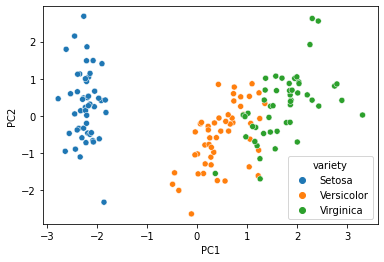

In [34]:
# Visualise species distribution in 2D
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df_norm.drop(["variety"], axis=1))
df_pca = pca.transform(df_norm.drop(["variety"], axis=1))
df_pca = pd.DataFrame(df_pca, columns=["PC1", "PC2"])
df_pca = pd.concat([df_pca, df["variety"]], axis=1)
g = sns.scatterplot(x="PC1", y="PC2", data=df_pca, hue="variety")



In [25]:
from keras import Sequential
from keras.layers import Dense

In [26]:
model = Sequential()
model.add(Dense(10, input_dim=4, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                50        
                                                                 
 dense_3 (Dense)             (None, 3)                 33        
                                                                 
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


In [27]:
from sklearn.model_selection import train_test_split

X = df_norm.drop(["variety"], axis=1)
y = df_norm["variety"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [30]:
encoder = LabelEncoder()

encoder.fit(y_train)
encoded_y_train = encoder.transform(y_train)
dummy_y_train = np_utils.to_categorical(encoded_y_train)

In [31]:
encoder.fit(y_test)
encoded_y_test = encoder.transform(y_test)

model.fit(X_train, dummy_y_train, epochs=100, batch_size=10)

Epoch 1/100
12/12 [==============================] - 0s 761us/step - loss: 1.3040 - accuracy: 0.2833
Epoch 2/100
12/12 [==============================] - 0s 1ms/step - loss: 1.2307 - accuracy: 0.2917
Epoch 3/100
12/12 [==============================] - 0s 849us/step - loss: 1.1662 - accuracy: 0.4167
Epoch 4/100
12/12 [==============================] - 0s 1ms/step - loss: 1.1069 - accuracy: 0.5000
Epoch 5/100
12/12 [==============================] - 0s 863us/step - loss: 1.0554 - accuracy: 0.5583
Epoch 6/100
12/12 [==============================] - 0s 768us/step - loss: 1.0062 - accuracy: 0.5750
Epoch 7/100
12/12 [==============================] - 0s 714us/step - loss: 0.9573 - accuracy: 0.6250
Epoch 8/100
12/12 [==============================] - 0s 709us/step - loss: 0.9154 - accuracy: 0.6333
Epoch 9/100
12/12 [==============================] - 0s 708us/step - loss: 0.8736 - accuracy: 0.6417
Epoch 10/100
12/12 [==============================] - 0s 882us/step - loss: 0.8345 - accuracy: 

In [32]:
scores = model.evaluate(X_test, dummy_y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


NameError: name 'dummy_y_test' is not defined

In [ ]:
dummy_y_test

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)